In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import json
from IPython.display import HTML, Image

In [2]:
class Solver:
    def __init__(self, params):
        params_file = open("params_file.json", "w")
        json.dump(params, params_file)
        params_file.close()
        subprocess.call(["../../facultative_cpp/cpp_7_week/week_7/week_7/main", "params_file.json"])
        self.solution = np.loadtxt(params["output"]).transpose()
        self.t = self.solution[0]
        self.x = self.solution[1]
        self.v = self.solution[2]
    
    def get_plot_x_t(self):
        %matplotlib notebook
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(8,8)
        ax.plot(t, x)
        ax.set_xlabel('t')
        ax.set_ylabel('x')
        
    def get_plot_v_t(self):
        %matplotlib notebook
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(8,8)
        ax.plot(t, v)
        ax.set_xlabel('t')
        ax.set_ylabel('v')
        
    def get_plot_x_v(self):
        %matplotlib notebook
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(8,8)
        ax.plot(x, v)
        ax.set_xlabel('x')
        ax.set_ylabel('v')
        
    def get_all_plots(self):
        %matplotlib notebook
        fig, ax = plt.subplots(1, 3)
        fig.set_size_inches(9, 3)
        ax[0].plot(self.t, self.x)
        ax[0].set_xlabel('t')
        ax[0].set_ylabel('x')
        
        ax[1].plot(self.t, self.v)
        ax[1].set_xlabel('t')
        ax[1].set_ylabel('v')
        
        ax[2].plot(self.x, self.v)
        ax[2].set_xlabel('x')
        ax[2].set_ylabel('v')

 Параметры
    "type": 0 - гармонические колебания
            1 - физ маятник
            2 - физ маятник с затуханием 
            3 - физ маятник вынужденные с затуханием 
    "method_type": 0 - метод Эйлера 
                   1 - метод Хойна 
                   2 - метод Рунге-Кутты
    "x_0" - начальный x
    "v_0" - начальный v
    "omega" - частота колубаний
    "gamma" - коэф затухания (для 3, 4)
    "omega_f" - коэф затухания (для 4)
    "A" - Амплитуда силы (для 4)
    "fr" - начальное время
    "to" - конечное время
    "delta" - шаг времени (точность) 
    "output": файл для вывода
    
    
пример:

params = {
    "type": str(2),
    "method_type": str(0),
    "x_0": str(1),
    "v_0": str(0),
    "omega": str(10),
    "gamma": str(0),
    "omega_f": str(10),
    "A": str(10),
    "from": str(0),
    "to": str(5),
    "delta": str(0.0001),
    "output": "output.txt",
}

пример решения 
    solver = Solver(params)
    
для построения графиков
    solver.get_plot_x_t() - x(t)
    solver.get_plot_v_t() - v(t)
    solver.get_plot_x_v() - x(v)
    solver.get_all_plots() - все вышеперечисленные 

<IPython.core.display.Javascript object>


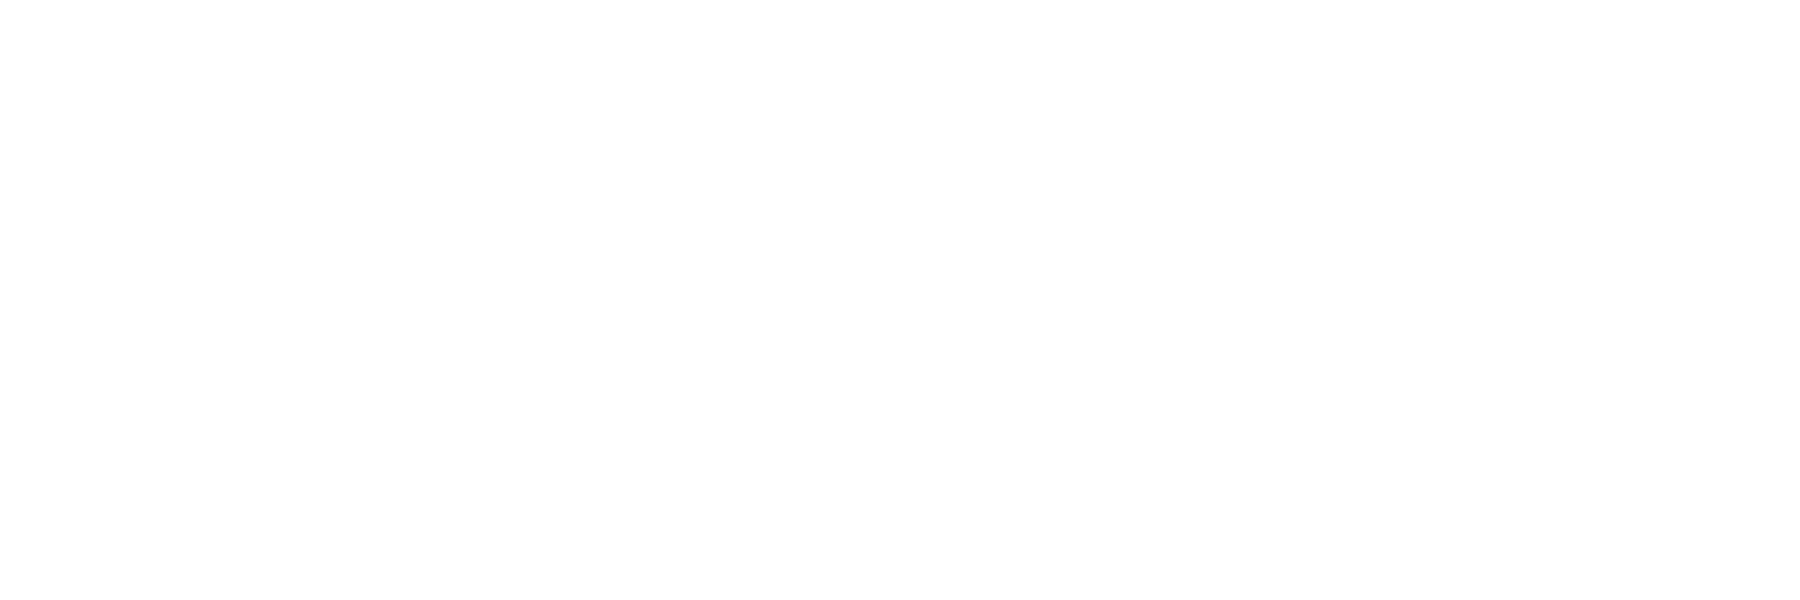

In [3]:
params = {
    "type": str(0),
    "method_type": str(1),
    "x_0": str(1),
    "v_0": str(0),
    "omega": str(10),
    "gamma": str(0),
    "omega_f": str(1),
    "A": str(100),
    "from": str(0),
    "to": str(1000),
    "delta": str(0.001),
    "output": "output.txt",
}

solver = Solver(params)
solver.get_all_plots()

<IPython.core.display.Javascript object>


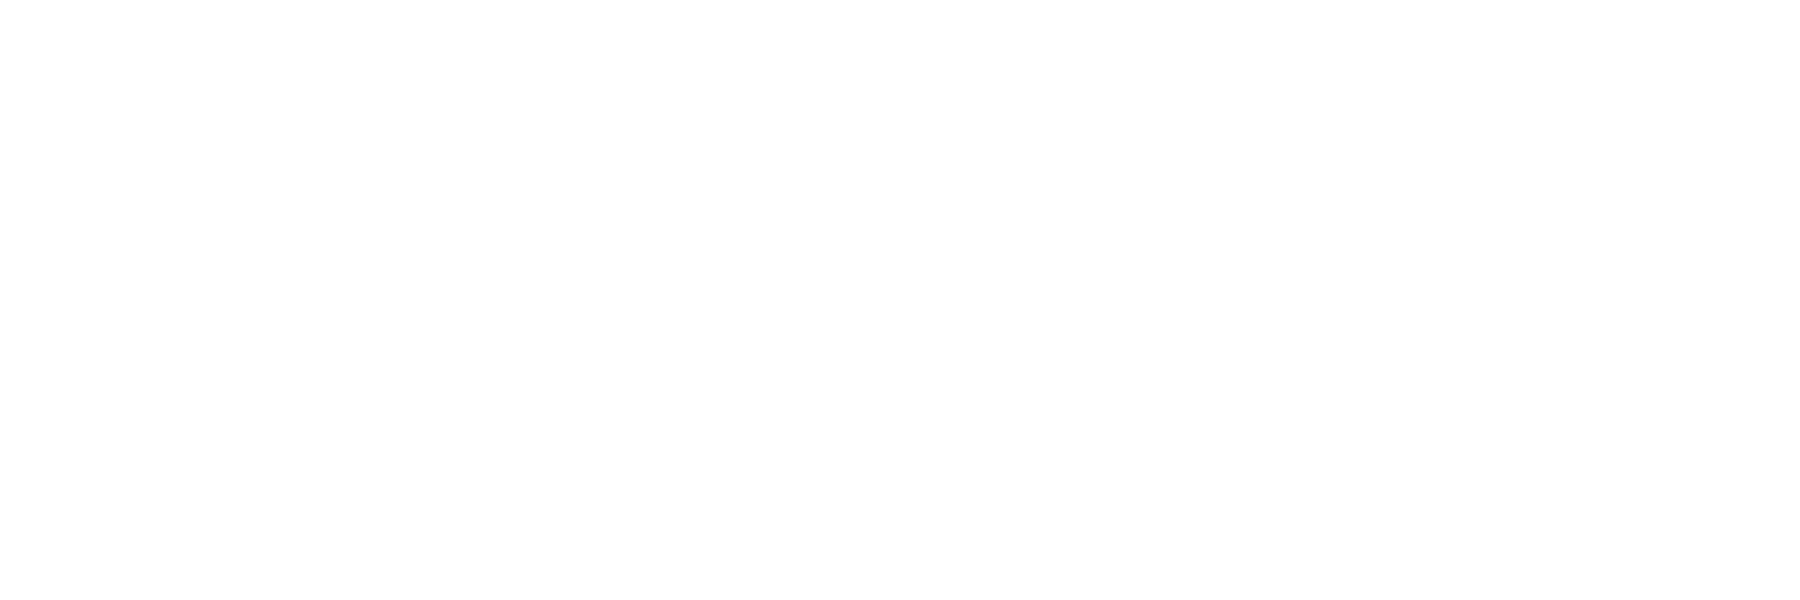

In [4]:
params = {
    "type": str(0),
    "method_type": str(2),
    "x_0": str(1),
    "v_0": str(0),
    "omega": str(10),
    "gamma": str(0),
    "omega_f": str(1),
    "A": str(100),
    "from": str(0),
    "to": str(1000),
    "delta": str(0.001),
    "output": "output.txt",
}

solver = Solver(params)
solver.get_all_plots()

In [15]:
params = {
    "type": str(4),
    "method_type": str(1),
    "phi_1": str(np.pi / 2),
    "phi_2": str(np.pi),
    "v_1": str(1),
    "v_2": str(1),
    "l": str(1),
    "m": str(1),
    "from": str(0),
    "to": str(1000),
    "delta": str(0.001),
    "output": "output.txt",
}

In [16]:
params_file = open("params_file.json", "w")
json.dump(params, params_file)
params_file.close()
subprocess.call(["../../facultative_cpp/cpp_7_week/week_7/week_7/main", "params_file.json"])
solution = np.loadtxt(params["output"]).transpose()

<IPython.core.display.Javascript object>


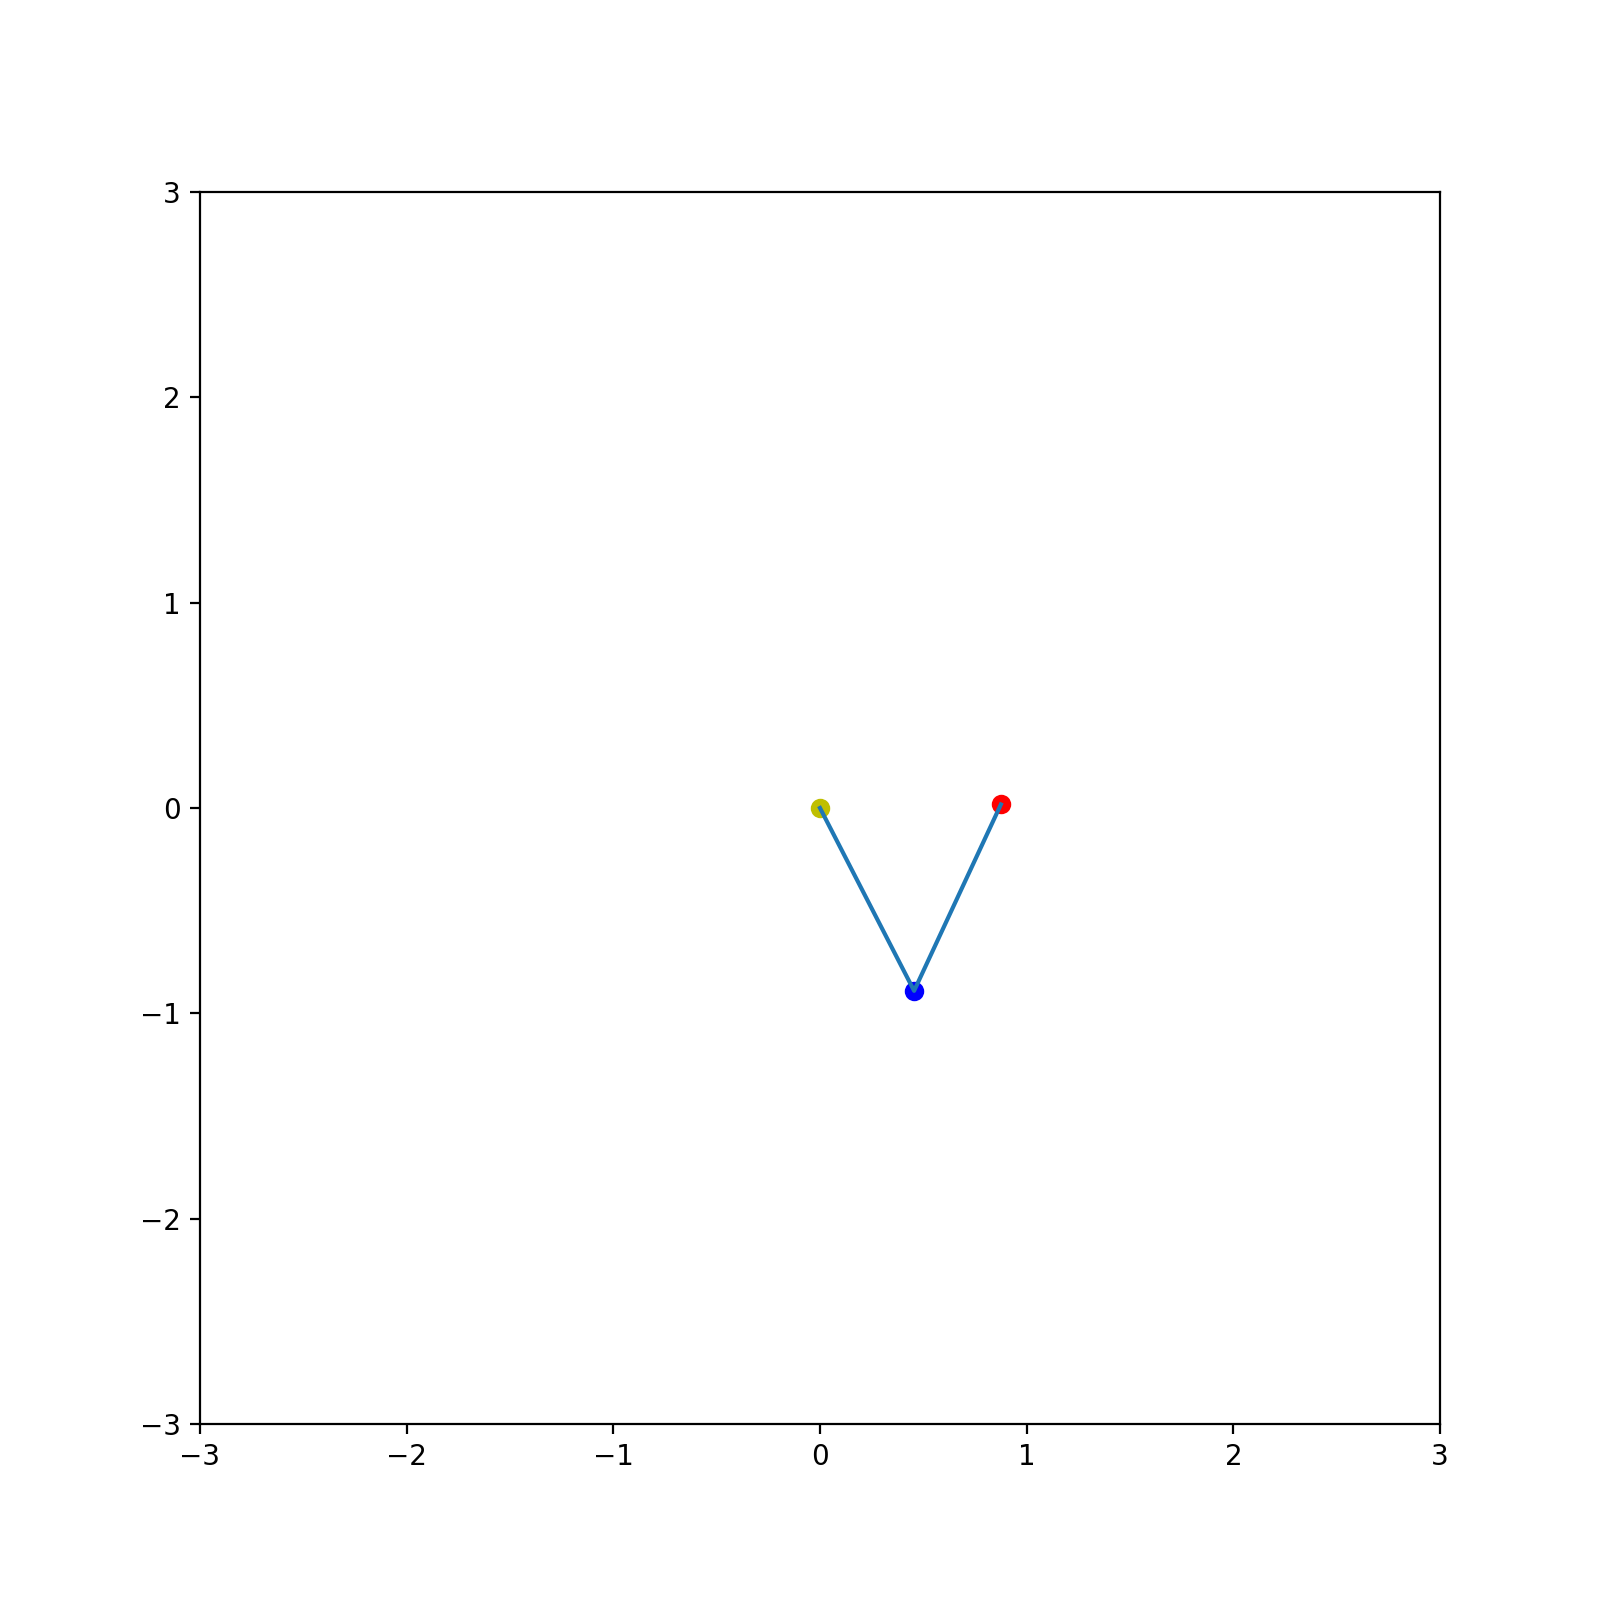

In [17]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

a = np.sin(solution[1])
b = -np.cos(solution[1])

aa = np.sin(solution[1]) + np.sin(solution[2])
bb = -np.cos(solution[1]) - np.cos(solution[2])


ax = plt.axis([-3,3,-3,3])

redDot, = plt.plot(aa[0], bb[0], 'ro')

blueDot, = plt.plot(a[0], b[0], 'bo')

centerDot, = plt.plot(0, 0, 'yo')

lines, = plt.plot([0, a[0], aa[0]], [0, b[0], bb[0]])


def animate(i):
    lines.set_data([0, a[i], aa[i]], [0, b[i], bb[i]])
    redDot.set_data(aa[i], bb[i])
    blueDot.set_data(a[i], b[i])
    
    
    return (redDot, blueDot)


# writergmp4 = matplotlib.animation.FFMpegWriter(fps=10)
myAnimation = FuncAnimation(fig, animate, interval=1, blit=True, repeat=True)
# myAnimation.save('animation.mp4', writer=writermp4)
# # myAnimation.save('animation.gif', writer='imagemagick', fps=30)
plt.show()

In [ ]:
%matplotlib notebook
plt.plot(solution[0], solution[3], solution[0], solution[4])


In [ ]:
!brew install imagemagick